
Machine learning is producing increase advantages in business values and efficiencies.  However, we need to be alert of bias in machine learning models that are producing inequalities to large portions of the population.  These bias models can target gender, race, age, income levels, …   The effect can include lost opportunities for employment, financial services, housing, fair judicial system, …

This bias and potential inequality can be an unnoticed process but have a powerful impact.  It is up to us to include in our development and maintenance process to look for bias in eradicate it.
Machine learning by default is bias, since it relies on statistical bias. This is required to make predictions, classifications, and correlations on new data the model has never seen before. However, focus needs to be put on the bias on the algorithms and training data used to create the models in the first place.

We will focus on  research conducted by ProPublica, a non-profit research institution, it was found that COMPAS, a machine learning algorithm used to determine criminal defendants’ likelihood to recommit crimes.  
We will:
1.	Get data 
2.	Initial - Exploratory data analysis (EDA)
3.	Initial – Data Wrangling
4.	Exploratory data analysis (EDA)
5.	Feature Engineering - Prepare the data for Machine Learning Algorithms
6.	Train, Evaluate, and Select a Model

Work in progress

7.	Using Variant Autoencoder (VAE - tensorflow) 
   Build  ML transformer of original  dataset , but removes sensitivity (race) while keeping almost    all data
   
8.	Using Variant Fair Autoencoder (VFAE - tensorflow) 
   Bias is removed


Data:
•	Compass dataset - The data set tracks Broward county Florida 
•	US census data for some initial data comparisons



# Machine Bias
# 
"""
https://www.propublica.org/article/how-we-analyzed-the-compas-recidivism-algorithm

Context
COMPAS (Correctional Offender Management Profiling for Alternative Sanctions) is a popular commercial algorithm used by judges
and parole officers for scoring criminal defendant’s likelihood of reoffending (recidivism). It has been shown that the algorithm
is biased in favor of white defendants, and against black inmates, based on a 2 year follow up study (i.e who actually committed
crimes or violent crimes after 2 years). The pattern of mistakes, as measured by precision/sensitivity is notable.

Quoting from ProPublica: 

Black defendants were often predicted to be at a higher risk of recidivism than they actually were. Our analysis found that black defendants
who did not recidivate over a two-year period were nearly twice as likely to be misclassified as higher risk compared to their white counterparts
(45 percent vs. 23 percent). White defendants were often predicted to be less risky than they were. Our analysis found that white defendants who
re-offended within the next two years were mistakenly labeled low risk almost twice as often as black re-offenders (48 percent vs. 28 percent).
The analysis also showed that even when controlling for prior crimes, future recidivism, age, and gender, black defendants were 45 percent more
likely to be assigned higher risk scores than white defendants.

Black defendants were also twice as likely as white defendants to be misclassified as being a higher risk of violent recidivism. And white violent
recidivists were 63 percent more likely to have been misclassified as a low risk of violent recidivism, compared with black violent recidivists.
The violent recidivism analysis also showed that even when controlling for prior crimes, future recidivism, age, and gender, black defendants were
77 percent more likely to be assigned higher risk scores than white defendants. "

Content
Data contains variables used by the COMPAS algorithm in scoring defendants, along with their outcomes within 2 years of the decision, for over
10,000 criminal defendants in Broward County, Florida. 3 subsets of the data are provided, including a subset of only violent
recividism (as opposed to, e.g. being reincarcerated for non violent offenses such as vagrancy or Marijuana).

Indepth analysis by ProPublica can be found in their data methodology article.



Each pretrial defendant received at least three COMPAS scores:  (DisplayText)
“Risk of Recidivism,”
“Risk of Violence” 
“Risk of Failure to Appear.”

COMPAS scores for each defendant ranged from1 to 10, with ten being the highest risk. Scores (ScoreTex)
1 to 4 were labeled by COMPAS as “Low”;
5 to 7 were labeled “Medium”; and
8 to 10 were labeled “High.”


Columns
0 - 4  : 'Person_ID','AssessmentID','Case_ID','Agency_Text', 'LastName',
5 - 9  : 'FirstName', 'MiddleName', 'Sex_Code_Text', 'Ethnic_Code_Text','DateOfBirth',
10 - 14: 'ScaleSet_ID', 'ScaleSet', 'AssessmentReason','Language', 'LegalStatus',
15 - 19: 'CustodyStatus', 'MaritalStatus','Screening_Date', 'RecSupervisionLevel', 'RecSupervisionLevelText',
20 - 24: 'Scale_ID', 'DisplayText', 'RawScore', 'DecileScore', 'ScoreText',
25 - 27: 'AssessmentType', 'IsCompleted', 'IsDeleted'

In [1]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# For preprocessing the data
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
# Standardizing
from sklearn.preprocessing import StandardScaler
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To calculate the accuracy score of the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#
from datetime import datetime
from datetime import date
#
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#
import collections


In [2]:
# load dataset
pthfnm = "./compas-scores-raw.csv"
df = pd.read_csv(pthfnm)

In [3]:
# initial EDA
print(df.shape)
print(df.info())

(60843, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60843 entries, 0 to 60842
Data columns (total 28 columns):
Person_ID                  60843 non-null int64
AssessmentID               60843 non-null int64
Case_ID                    60843 non-null int64
Agency_Text                60843 non-null object
LastName                   60843 non-null object
FirstName                  60843 non-null object
MiddleName                 15648 non-null object
Sex_Code_Text              60843 non-null object
Ethnic_Code_Text           60843 non-null object
DateOfBirth                60843 non-null object
ScaleSet_ID                60843 non-null int64
ScaleSet                   60843 non-null object
AssessmentReason           60843 non-null object
Language                   60843 non-null object
LegalStatus                60843 non-null object
CustodyStatus              60843 non-null object
MaritalStatus              60843 non-null object
Screening_Date             60843 non-null object
R

In [4]:
# Review data and Manipulate Data

# Ethnic_Code_Text
print(df.Ethnic_Code_Text.unique())

['Caucasian' 'African-American' 'Hispanic' 'Other' 'Asian' 'African-Am'
 'Native American' 'Oriental' 'Arabic']


In [5]:
# update 'Ethnic_Code_Text' to have conistent values for African Americans
df.loc[df['Ethnic_Code_Text'] == 'African-Am', 'Ethnic_Code_Text'] = 'African-American'
print(pd.value_counts(df['Ethnic_Code_Text']))

African-American    27069
Caucasian           21783
Hispanic             8742
Other                2592
Asian                 324
Native American       219
Arabic                 75
Oriental               39
Name: Ethnic_Code_Text, dtype: int64


In [6]:
# DecileScore should be between 1 & 10, delete otherwise
df.DecileScore.unique()
print((df['DecileScore'] < 1).sum())

45


In [7]:
# remove DecileScore < 1
df = df[df.DecileScore >= 1]
print(pd.value_counts(df['DecileScore']))

1     18465
2      9192
3      8492
4      5338
5      4831
6      4319
7      3338
8      2799
9      2386
10     1638
Name: DecileScore, dtype: int64


In [8]:
# slice and dice

# Slice by 'Ethnic_Code_Text' for blacks & whites
black = df.loc[df['Ethnic_Code_Text'] == 'African-American']
white = df.loc[df['Ethnic_Code_Text'] == 'Caucasian']
joint = df.loc[df['Ethnic_Code_Text'].isin (['Caucasian','African-American'])]
print('black :', black.shape, ' white: ', white.shape, ' joint: ', joint.shape)

black : (27053, 28)  white:  (21765, 28)  joint:  (48818, 28)


In [9]:
# Slice by 'Sex_Code_Text' for males & females
male = df.loc[df['Sex_Code_Text'] == 'Male']
female = df.loc[df['Sex_Code_Text'] == 'Female']
print('male :', male.shape, ' female: ', female.shape)

male : (47479, 28)  female:  (13319, 28)


In [10]:
# Slice by 'DisplayText' for Risk
RiskAppear = df.loc[df['DisplayText'] == 'Risk of Failure to Appear']
RiskViolence = df.loc[df['DisplayText'] == 'Risk of Violence']
RiskRecidivism = df.loc[df['DisplayText'] == 'Risk of Recidivism']
print('Appear:', RiskAppear.shape, ' Violence: ', RiskViolence.shape,  ' Recidivism:',RiskRecidivism.shape)

Appear: (20281, 28)  Violence:  (20272, 28)  Recidivism: (20245, 28)


In [11]:
# Aggregate
grprace = df.groupby(['Ethnic_Code_Text']).count()
grpgender = df.groupby(['Sex_Code_Text']).count()
print('Race: ',grprace.shape, ' Gender:', grpgender.shape)

Race:  (8, 27)  Gender: (2, 27)


# EDA  - looking at potential bias



In [12]:
## Display distribution of group data
# % data distribution by Ethnic_Code_Text
round(grprace[['DecileScore']]/len(df),4)*100

,DecileScore
Ethnic_Code_Text,
African-American,44.50
Arabic,0.12
Asian,0.53
Caucasian,35.80
Hispanic,14.36
Native American,0.36
Oriental,0.06
Other,4.26


In [13]:
# There are more African Americans (45%) in the dataset, eventhough in the county African American only make 
# up (30%) of the population

In [14]:
# % data distribution by Sex_Code_Text
round(grpgender[['DecileScore']]/len(df),4)*100


,DecileScore
Sex_Code_Text,
Female,21.91
Male,78.09


In [15]:
# There are more males (78%) in the dataset, eventhough in the county males make 
# up (49%) of the population

In [16]:
# DecileScore Mean by race
race=df.Ethnic_Code_Text.unique()
print('Mean DecileScore by Race')
for i in race:
    mn = round(df.loc[df['Ethnic_Code_Text'] == i]['DecileScore'].mean(), 2)
    print(i,'- ',mn)

Mean DecileScore by Race
Caucasian -  3.11
African-American -  4.29
Hispanic -  2.86
Other -  2.51
Asian -  2.37
Native American -  4.05
Oriental -  2.74
Arabic -  3.13


In [17]:
# Mean DecileScore is highest for African Americans

In [18]:
# DecileScore Mean by gender
gender=df.Sex_Code_Text.unique()
print('Mean DecileScore by Gender')
for i in gender:
    mn = round(df.loc[df['Sex_Code_Text'] == i]['DecileScore'].mean(), 2)
    print(i,'- ',mn)

Mean DecileScore by Gender
Male -  3.66
Female -  3.26


In [19]:
# Mean DecileScore is highest for males

In [20]:
# Visualize

In [19]:
# Define grp_plot_compare:
# creates groups and then plot them to compare them
def grp_plot_compare(df1, df2, xlabel1, colnm1, total_pop, multby, title,label1, label2):
    grp1 = df1.groupby([xlabel1]).count()
    grp2 = df2.groupby([xlabel1]).count()
    
#   to be used for weighted average  
    div1 = len(df1)
    div2 = len(df2)
    
    n_groups = len(grp1)
# create plot
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.8

    rects1 = plt.bar(grp1.index,(round(grp1[colnm1]/div1,2)*multby), bar_width,
                 alpha=opacity,
                 color='b',
                 label=label1)

    rects2 = plt.bar(grp2.index+ bar_width, (round(grp2[colnm1]/div2,2)*multby), bar_width,
                 alpha=opacity,
                 color='g',
                 label=label2)

    plt.xlabel(xlabel1)
    if total_pop > 1:
        plt.ylabel('Percentage')
    else:
        plt.ylabel('Count')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()
    plt.clf()

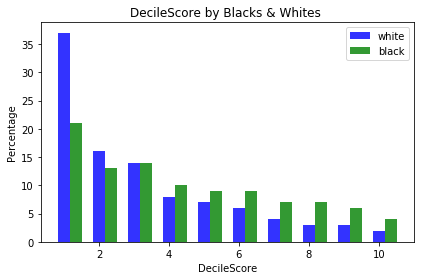

In [20]:
# Comparing White & Black defendants on the  'DecileScore'
grp_plot_compare(white, black, 'DecileScore','Ethnic_Code_Text', len(df), 100, \
                 'DecileScore by Blacks & Whites ', \
                 'white','black')

In [23]:
# Whites have lower Decile Scores and Blacks have higher Decile Scores

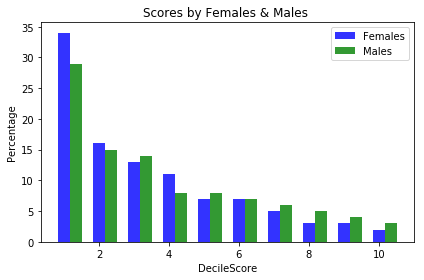

In [21]:
# Comparing Male & Female defendants on the  'DecileScore'
grp_plot_compare(female, male, 'DecileScore','Sex_Code_Text', len(df), 100, \
                 'Scores by Females & Males ', \
                 'Females','Males')


In [25]:
# Females have lower Decile Scores and Males have higher Decile Scores

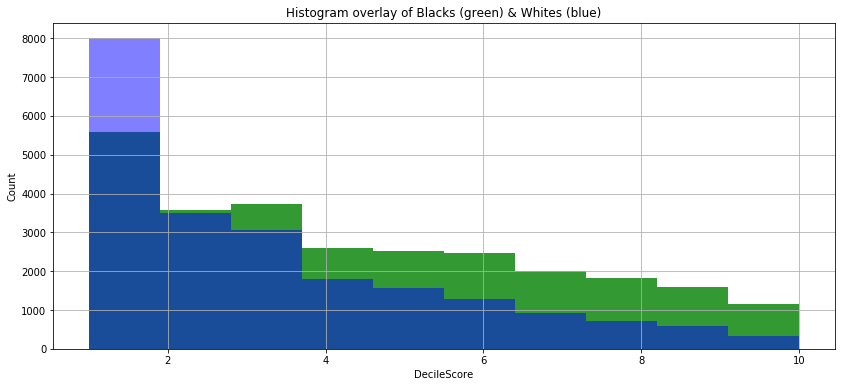

In [22]:
####################################################################################
# Histogram overlay
fig, ax = plt.subplots()
black['DecileScore'].hist(bins=10, figsize=[14,6],color='g',alpha=.8 )
white['DecileScore'].hist(bins=10, figsize=[14,6],color='b',alpha=.5 )
plt.title('Histogram overlay of Blacks (green) & Whites (blue)')
plt.legend()
plt.xlabel('DecileScore')
plt.ylabel('Count')
plt.show()
plt.clf()

# Feature Engineering

In [23]:
# Add column 'Age' from DateofBirth
agelist = []
currdate = date.today()
for dte in df['DateOfBirth']:
    brthdte = datetime.strptime(dte, '%m/%d/%y')
    mnthday = (currdate.month, currdate.day) < (brthdte.month, brthdte.day)
    if currdate.year > brthdte.year:
        agelist.append(currdate.year - brthdte.year - (mnthday))
    else:
        agelist.append(-1)
        

In [24]:
print(len(agelist), len(df))
df['Age'] = agelist
print(df.columns)

60798 60798
Index(['Person_ID', 'AssessmentID', 'Case_ID', 'Agency_Text', 'LastName',
       'FirstName', 'MiddleName', 'Sex_Code_Text', 'Ethnic_Code_Text',
       'DateOfBirth', 'ScaleSet_ID', 'ScaleSet', 'AssessmentReason',
       'Language', 'LegalStatus', 'CustodyStatus', 'MaritalStatus',
       'Screening_Date', 'RecSupervisionLevel', 'RecSupervisionLevelText',
       'Scale_ID', 'DisplayText', 'RawScore', 'DecileScore', 'ScoreText',
       'AssessmentType', 'IsCompleted', 'IsDeleted', 'Age'],
      dtype='object')


In [25]:
# cleanup bad Ages
# remove DecileScore < 1
(df['Age'] < 1).sum()

12782

In [26]:
df = df[df.Age >= 1]
(df['Age'] < 1).sum()

0

In [27]:
df['Age'].describe()

count    48016.000000
mean        33.105090
std          7.189823
min         20.000000
25%         27.000000
50%         32.000000
75%         38.000000
max         49.000000
Name: Age, dtype: float64

In [28]:
# Slice by 'DisplayText' for Risk
RiskAppear = df.loc[df['DisplayText'] == 'Risk of Failure to Appear']
RiskViolence = df.loc[df['DisplayText'] == 'Risk of Violence']
RiskRecidivism = df.loc[df['DisplayText'] == 'Risk of Recidivism']
print('Appear:', RiskAppear.shape, ' Violence: ', RiskViolence.shape,  ' Recidivism:',RiskRecidivism.shape)

Appear: (16016, 29)  Violence:  (16010, 29)  Recidivism: (15990, 29)


In [42]:
# More feature engineering using Label encoder and One-Hot encoder

# Running ML models

# Train, Evaluate, and Select a Model

In [29]:
# Define prepare_data_for_ml_model_1:
def prepare_data_for_ml_model_1(dfx, target_loc):
    # Create new Dataset of selected columns to get prepare TEST and Training data for  ML model 
     
    """
    Columns
    0 - 4  : 'Person_ID','AssessmentID','Case_ID','Agency_Text', 'LastName',
    5 - 9  : 'FirstName', 'MiddleName', 'Sex_Code_Text', 'Ethnic_Code_Text','DateOfBirth',
    10 - 14: 'ScaleSet_ID', 'ScaleSet', 'AssessmentReason','Language', 'LegalStatus',
    15 - 19: 'CustodyStatus', 'MaritalStatus','Screening_Date', 'RecSupervisionLevel', 'RecSupervisionLevelText',
    20 - 24: 'Scale_ID', 'DisplayText', 'RawScore', 'DecileScore', 'ScoreText',
    25 - 28: 'AssessmentType', 'IsCompleted', 'IsDeleted','Age'
    """

    x_df = dfx.iloc[:, [7,8,14,15,16,19]] #features
    tmp_age = dfx.iloc[:,28].as_matrix() #age feature, convert numpy array
    x_age = tmp_age.reshape(tmp_age.size,1)
    

    y = dfx.iloc[:,target_loc].as_matrix() #target convert numpy array


    #  lable encoder. It encodes the data into integers
    le = LabelEncoder()

    Sex_Code_Text_cat = le.fit_transform(x_df.Sex_Code_Text)
    Ethnic_Code_Text_cat = le.fit_transform(x_df.Ethnic_Code_Text)
    LegalStatus_cat = le.fit_transform(x_df.LegalStatus)
    CustodyStatus_cat = le.fit_transform(x_df.CustodyStatus)
    MaritalStatus_cat = le.fit_transform(x_df.MaritalStatus)
    RecSupervisionLevelText_cat = le.fit_transform(x_df.RecSupervisionLevelText)

    Sex_Code_Text_cat = Sex_Code_Text_cat.reshape(len(Sex_Code_Text_cat),1)
    Ethnic_Code_Text_cat = Ethnic_Code_Text_cat.reshape(len(Ethnic_Code_Text_cat),1)
    LegalStatus_cat = LegalStatus_cat.reshape(len(LegalStatus_cat),1)
    CustodyStatus_cat = CustodyStatus_cat.reshape(len(CustodyStatus_cat),1)
    MaritalStatus_cat = MaritalStatus_cat.reshape(len(MaritalStatus_cat),1)
    RecSupervisionLevelText_cat = RecSupervisionLevelText_cat.reshape(len(RecSupervisionLevelText_cat),1)

#  One-Hot encoder. It encodes the data into binary format
    onehote = OneHotEncoder(sparse=False)
    
    Sex_Code_Text_oh = onehote.fit_transform(Sex_Code_Text_cat)
    Ethnic_Code_Text_oh = onehote.fit_transform(Ethnic_Code_Text_cat)
    LegalStatus_oh = onehote.fit_transform(LegalStatus_cat)
    CustodyStatus_oh = onehote.fit_transform(CustodyStatus_cat)
    MaritalStatus_oh = onehote.fit_transform(MaritalStatus_cat)
    RecSupervisionLevelText_oh = onehote.fit_transform(RecSupervisionLevelText_cat)

# Build out feature dataset as numpy array, since One-Hot encoder creates numpy array
    X_feature =  Sex_Code_Text_oh
    X_feature = np.concatenate((X_feature,Ethnic_Code_Text_oh), axis=1)
    X_feature = np.concatenate((X_feature,LegalStatus_oh), axis=1)
    X_feature = np.concatenate((X_feature,CustodyStatus_oh), axis=1)
    X_feature = np.concatenate((X_feature,MaritalStatus_oh), axis=1)
    X_feature = np.concatenate((X_feature,RecSupervisionLevelText_oh), axis=1)
    X_feature = np.concatenate((X_feature,x_age), axis=1)

# Split data train and test
    X_train, X_test, y_train, y_test = train_test_split(X_feature, y, test_size=0.2)
    print('Length for X_train:', len(X_train), ' X_test:',len(X_test), ' y_train:',len(y_train) ,' y_test:',len(y_test))

    return X_train, X_test, y_train, y_test

In [30]:
# Define ml_model_1:
# takes in model Instantiate model (model)
# fits, predicts, and evaluates (prints results)
def ml_model_1(model, modelnm, dfnm, X_train, X_test, y_train, y_test, target):
    print('Running ', modelnm, ' model for :', dfnm, ' using target: ', target)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #Evaluate
    print(modelnm,' score: ',model.score(X_test, y_test))
    print(' ')
    print('first 10 predicted values: ',y_pred[0:10])
    print('first 10 values of target: ')
    print(y_test[0:10])
    print(' ')

    print('mean of predicted of values: ',np.mean(y_pred), ' STD of predicted of values : ', np.std(y_pred) )
    print('describe of target')
    print('mean of predicted of values: ',np.mean(y_test), ' STD of predicted of values : ', np.std(y_test) )

    return y_pred

In [31]:
# MLPRegressor

In [32]:
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor(alpha=0.001, hidden_layer_sizes = (10,), max_iter = 50000, 
                 activation = 'logistic', verbose = 'True', learning_rate = 'adaptive')

In [33]:
# MLPRegressor - RiskViolence dataset target RawScore (22)
# Preparing the data
X_train, X_test, y_train, y_test = prepare_data_for_ml_model_1(RiskViolence,22)

Length for X_train: 12808  X_test: 3202  y_train: 12808  y_test: 3202


In [34]:
# Predicting and getting score
ml_model_1(clf, 'MLPRegressor', 'RiskViolence', X_train, X_test, y_train, y_test, 'RawScore')

Running  MLPRegressor  model for : RiskViolence  using target:  RawScore
Iteration 1, loss = 2.31215575
Iteration 2, loss = 0.67545936
Iteration 3, loss = 0.25391329
Iteration 4, loss = 0.23153549
Iteration 5, loss = 0.20882537
Iteration 6, loss = 0.16323103
Iteration 7, loss = 0.12258844
Iteration 8, loss = 0.09826693
Iteration 9, loss = 0.08385181
Iteration 10, loss = 0.07632427
Iteration 11, loss = 0.07200236
Iteration 12, loss = 0.06966134
Iteration 13, loss = 0.06764632
Iteration 14, loss = 0.06660264
Iteration 15, loss = 0.06593033
Iteration 16, loss = 0.06534268
Iteration 17, loss = 0.06464936
Iteration 18, loss = 0.06425643
Iteration 19, loss = 0.06403874
Iteration 20, loss = 0.06353387
Iteration 21, loss = 0.06352928
Iteration 22, loss = 0.06306643
Iteration 23, loss = 0.06286638
Iteration 24, loss = 0.06294748
Iteration 25, loss = 0.06253498
Iteration 26, loss = 0.06222204
Iteration 27, loss = 0.06200214
Iteration 28, loss = 0.06171177
Iteration 29, loss = 0.06190838
Iteratio

array([-2.33907622, -2.09601027, -2.05882862, ..., -2.92534171,
       -2.44201917, -1.42836332])

In [35]:
# Running  MLPRegressor  model for : RiskViolence  using target:  RawScore
#  score:  0.8007348392629005

In [36]:
# MLPRegressor - RiskRecidivism dataset target RawScore (22)
X_train, X_test, y_train, y_test = prepare_data_for_ml_model_1(RiskRecidivism,22)

Length for X_train: 12792  X_test: 3198  y_train: 12792  y_test: 3198


In [37]:
# Predicting and getting score
ml_model_1(clf, 'MLPRegressor', 'RiskRecidivism', X_train, X_test, y_train, y_test, 'RawScore')

Running  MLPRegressor  model for : RiskRecidivism  using target:  RawScore
Iteration 1, loss = 0.27876187
Iteration 2, loss = 0.21708268
Iteration 3, loss = 0.16986971
Iteration 4, loss = 0.13798626
Iteration 5, loss = 0.11521034
Iteration 6, loss = 0.09840374
Iteration 7, loss = 0.08401097
Iteration 8, loss = 0.07586699
Iteration 9, loss = 0.07160267
Iteration 10, loss = 0.06912477
Iteration 11, loss = 0.06791188
Iteration 12, loss = 0.06725879
Iteration 13, loss = 0.06692494
Iteration 14, loss = 0.06657382
Iteration 15, loss = 0.06637183
Iteration 16, loss = 0.06616046
Iteration 17, loss = 0.06611753
Iteration 18, loss = 0.06596459
Iteration 19, loss = 0.06577505
Iteration 20, loss = 0.06587346
Iteration 21, loss = 0.06556513
Iteration 22, loss = 0.06576179
Iteration 23, loss = 0.06595386
Iteration 24, loss = 0.06538523
Iteration 25, loss = 0.06538642
Iteration 26, loss = 0.06515448
Iteration 27, loss = 0.06498680
Iteration 28, loss = 0.06493893
Iteration 29, loss = 0.06501275
Iterat

array([ 0.0908285 ,  0.33501662, -1.12287382, ...,  0.19820428,
        0.37891308, -1.1033755 ])

In [38]:
# MLPRegressor - RiskRecidivism dataset target DecileScore
X_train, X_test, y_train, y_test = prepare_data_for_ml_model_1(RiskRecidivism,23)

Length for X_train: 12792  X_test: 3198  y_train: 12792  y_test: 3198


In [39]:
# Predicting and getting score
ml_model_1(clf, 'MLPRegressor', 'RiskRecidivism', X_train, X_test, y_train, y_test, 'DecileScore')

Running  MLPRegressor  model for : RiskRecidivism  using target:  DecileScore
Iteration 1, loss = 15.20314262
Iteration 2, loss = 10.58155255
Iteration 3, loss = 8.11864329
Iteration 4, loss = 7.04692890
Iteration 5, loss = 5.88850869
Iteration 6, loss = 5.06862723
Iteration 7, loss = 4.63399323
Iteration 8, loss = 4.35335169
Iteration 9, loss = 4.17179125
Iteration 10, loss = 4.05597166
Iteration 11, loss = 3.98410162
Iteration 12, loss = 3.94046867
Iteration 13, loss = 3.91515816
Iteration 14, loss = 3.90019545
Iteration 15, loss = 3.89195482
Iteration 16, loss = 3.88715605
Iteration 17, loss = 3.88437861
Iteration 18, loss = 3.88169430
Iteration 19, loss = 3.87396496
Iteration 20, loss = 3.58283346
Iteration 21, loss = 3.34150241
Iteration 22, loss = 3.21725603
Iteration 23, loss = 3.11930507
Iteration 24, loss = 3.03488190
Iteration 25, loss = 2.95817254
Iteration 26, loss = 2.88620751
Iteration 27, loss = 2.81680232
Iteration 28, loss = 2.74906780
Iteration 29, loss = 2.68110393
I

array([2.9275341 , 6.22178997, 5.87951947, ..., 8.4277045 , 8.25037201,
       2.85537161])

# Model Best Score 
Running MLPRegressor model for : RiskRecidivism using target: DecileScore score:  0.8414744125013081

In [ ]:
# create to new subsets from RiskRecidivism
# non-sensitive features:  sex_code_text, legal_status,  Custody_status, 
#                           Marital_status,Age
#  sensitive features : Ethnic_code_text

In [40]:
print(RiskRecidivism.shape)
print(RiskRecidivism.info())

(15990, 29)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15990 entries, 1 to 60841
Data columns (total 29 columns):
Person_ID                  15990 non-null int64
AssessmentID               15990 non-null int64
Case_ID                    15990 non-null int64
Agency_Text                15990 non-null object
LastName                   15990 non-null object
FirstName                  15990 non-null object
MiddleName                 4227 non-null object
Sex_Code_Text              15990 non-null object
Ethnic_Code_Text           15990 non-null object
DateOfBirth                15990 non-null object
ScaleSet_ID                15990 non-null int64
ScaleSet                   15990 non-null object
AssessmentReason           15990 non-null object
Language                   15990 non-null object
LegalStatus                15990 non-null object
CustodyStatus              15990 non-null object
MaritalStatus              15990 non-null object
Screening_Date             15990 non-null object
Re

In [41]:
print(X_train.shape)
print(len(X_train))



(12792, 35)
12792


In [42]:
# Define prepare_data_for_ml_model_1:
def prepare_data_for_ml_model_1(dfx, target_loc):
    # Create new Dataset of selected columns to get prepare TEST and Training data for  ML model 
     
    """
    Columns
    0 - 4  : 'Person_ID','AssessmentID','Case_ID','Agency_Text', 'LastName',
    5 - 9  : 'FirstName', 'MiddleName', 'Sex_Code_Text', 'Ethnic_Code_Text','DateOfBirth',
    10 - 14: 'ScaleSet_ID', 'ScaleSet', 'AssessmentReason','Language', 'LegalStatus',
    15 - 19: 'CustodyStatus', 'MaritalStatus','Screening_Date', 'RecSupervisionLevel', 'RecSupervisionLevelText',
    20 - 24: 'Scale_ID', 'DisplayText', 'RawScore', 'DecileScore', 'ScoreText',
    25 - 28: 'AssessmentType', 'IsCompleted', 'IsDeleted','Age'
    """

    #x_df = dfx.iloc[:, [7,8,14,15,16,19]] #features
    x_df = dfx.iloc[:, [7,14,15,16,19]] #features
    tmp_age = dfx.iloc[:,28].as_matrix() #age feature, convert numpy array
    x_age = tmp_age.reshape(tmp_age.size,1)
    

    y = dfx.iloc[:,target_loc].as_matrix() #target convert numpy array


    #  lable encoder. It encodes the data into integers
    le = LabelEncoder()

    Sex_Code_Text_cat = le.fit_transform(x_df.Sex_Code_Text)
    # Ethnic_Code_Text_cat = le.fit_transform(x_df.Ethnic_Code_Text)
    LegalStatus_cat = le.fit_transform(x_df.LegalStatus)
    CustodyStatus_cat = le.fit_transform(x_df.CustodyStatus)
    MaritalStatus_cat = le.fit_transform(x_df.MaritalStatus)
    RecSupervisionLevelText_cat = le.fit_transform(x_df.RecSupervisionLevelText)

    Sex_Code_Text_cat = Sex_Code_Text_cat.reshape(len(Sex_Code_Text_cat),1)
    # Ethnic_Code_Text_cat = Ethnic_Code_Text_cat.reshape(len(Ethnic_Code_Text_cat),1)
    LegalStatus_cat = LegalStatus_cat.reshape(len(LegalStatus_cat),1)
    CustodyStatus_cat = CustodyStatus_cat.reshape(len(CustodyStatus_cat),1)
    MaritalStatus_cat = MaritalStatus_cat.reshape(len(MaritalStatus_cat),1)
    RecSupervisionLevelText_cat = RecSupervisionLevelText_cat.reshape(len(RecSupervisionLevelText_cat),1)

#  One-Hot encoder. It encodes the data into binary format
    onehote = OneHotEncoder(sparse=False)
    
    Sex_Code_Text_oh = onehote.fit_transform(Sex_Code_Text_cat)
    # Ethnic_Code_Text_oh = onehote.fit_transform(Ethnic_Code_Text_cat)
    LegalStatus_oh = onehote.fit_transform(LegalStatus_cat)
    CustodyStatus_oh = onehote.fit_transform(CustodyStatus_cat)
    MaritalStatus_oh = onehote.fit_transform(MaritalStatus_cat)
    RecSupervisionLevelText_oh = onehote.fit_transform(RecSupervisionLevelText_cat)

# Build out feature dataset as numpy array, since One-Hot encoder creates numpy array
    X_feature =  Sex_Code_Text_oh
    # X_feature = np.concatenate((X_feature,Ethnic_Code_Text_oh), axis=1)
    X_feature = np.concatenate((X_feature,LegalStatus_oh), axis=1)
    X_feature = np.concatenate((X_feature,CustodyStatus_oh), axis=1)
    X_feature = np.concatenate((X_feature,MaritalStatus_oh), axis=1)
    X_feature = np.concatenate((X_feature,RecSupervisionLevelText_oh), axis=1)
    X_feature = np.concatenate((X_feature,x_age), axis=1)

# Split data train and test
    X_train, X_test, y_train, y_test = train_test_split(X_feature, y, test_size=0.2)
    print('Length for X_train:', len(X_train), ' X_test:',len(X_test), ' y_train:',len(y_train) ,' y_test:',len(y_test))

    return X_train, X_test, y_train, y_test

# Preparing for VAE using tensorflow

In [43]:
class dataReader(object):
    # Code provided by Andrei Fajardo
    # to substitude for ...train.next_batch

    def __init__(self,*arrays,batch_size=1):
        self.arrays = arrays
        self.__check_equal_shape()
        self.num_examples = self.arrays[0].shape[0]
        self.batch_number = 0
        self.batch_size = batch_size
        self.num_batches = int(np.ceil(self.num_examples / batch_size))

    def __check_equal_shape(self):
        if any(self.arrays[0].shape[0] != arr.shape[0] for arr in self.arrays[1:]):
            raise ValueError("all arrays must be equal along first dimension")

    def next_batch(self):
        low_ix = self.batch_number*self.batch_size
        up_ix = (self.batch_number + 1)*self.batch_size
        if up_ix >= self.num_examples:
            up_ix = self.num_examples
            self.batch_number = 0 # reset batch_number to zero
        else:
            self.batch_number = self.batch_number + 1

        return [arr[low_ix:up_ix,:] for arr in self.arrays]


In [44]:
#  Tensorflow  Implementation 

import tensorflow as tf
import os
import sys
from functools import partial
from sklearn.preprocessing import StandardScaler

In [45]:
# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [46]:
# RiskRecidivism dataset target RawScore (22)
# X_train.shape (12792, 35)
X_train, X_test, y_train, y_test = prepare_data_for_ml_model_1(RiskRecidivism,22)

Length for X_train: 12792  X_test: 3198  y_train: 12792  y_test: 3198


In [47]:
print(X_train.shape)

(12792, 27)


In [53]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X_train)
# X = tf.constant(X_scaler, dtype=tf.float32, name="X")
X = tf.placeholder(tf.float32, shape=[None, 27], name="X")


n_inputs = 27 # 28 * 28
n_hidden1 = 300
n_hidden2 = 150  
n_hidden3 = n_hidden1
n_outputs = n_inputs

learning_rate = 0.01
l2_reg = 0.0001

he_init = tf.contrib.layers.variance_scaling_initializer() # He initialization
#Equivalent to:
#he_init = lambda shape, dtype=tf.float32: tf.truncated_normal(shape, 0., stddev=np.sqrt(2/shape[0]))
l2_regularizer = tf.contrib.layers.l2_regularizer(l2_reg)
my_dense_layer = partial(tf.layers.dense,
                         activation=tf.nn.elu,
                         kernel_initializer=he_init,
                         kernel_regularizer=l2_regularizer)

hidden1 = my_dense_layer(X, n_hidden1)
hidden2 = my_dense_layer(hidden1, n_hidden2)
hidden3 = my_dense_layer(hidden2, n_hidden3)
outputs = my_dense_layer(hidden3, n_outputs, activation=None)

reconstruction_loss = tf.reduce_mean(tf.square(outputs - X))

reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
loss = tf.add_n([reconstruction_loss] + reg_losses)

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [54]:
# instatianate
data_reader = dataReader(X_scaler,y_train[:,np.newaxis]
, batch_size=150)

In [55]:
print(data_reader.num_batches)

86


In [56]:
n_epochs = 50
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        #n_batches = mnist.train.num_examples // batch_size
        n_batches = data_reader.num_batches
        for iteration in range(n_batches):
            print("\r{}%".format(100 * iteration // n_batches), end="")
            sys.stdout.flush()                                          
            X_batch, y_batch = data_reader.next_batch()
            sess.run(training_op, feed_dict={X: X_batch})

        loss_train = reconstruction_loss.eval(feed_dict={X: X_batch})   
        print("\r{}".format(epoch), "Train MSE:", loss_train)           
        saver.save(sess, "./my_model_all_layers.ckpt")


08% Train MSE: 0.030686384
18% Train MSE: 0.04635204
2 Train MSE: 0.012763539
3 Train MSE: 0.010931872
4 Train MSE: 0.026008682
5 Train MSE: 0.009271162
6 Train MSE: 0.6512807
7 Train MSE: 0.03371185
8 Train MSE: 0.017180419
98% Train MSE: 0.0066630775
10 Train MSE: 0.0038525949
11 Train MSE: 0.002831241
12 Train MSE: 0.0036277599
13 Train MSE: 0.007861103
14 Train MSE: 0.0039398195
15 Train MSE: 0.002703605
16 Train MSE: 0.0039192694
17 Train MSE: 0.0067845783
18 Train MSE: 0.004408289
19 Train MSE: 0.0065379078
20 Train MSE: 0.011140018
21% Train MSE: 0.004182887
22 Train MSE: 0.006605484
23 Train MSE: 0.0037944333
24 Train MSE: 0.0055763614
25 Train MSE: 0.0075460942
26 Train MSE: 0.015376168
27% Train MSE: 0.009692282
28 Train MSE: 0.025449881
29 Train MSE: 0.005599982
30 Train MSE: 877.78723
31% Train MSE: 23.390484
32 Train MSE: 6.5299625
33 Train MSE: 4.109535
34 Train MSE: 2.969798
35 Train MSE: 2.289897
36% Train MSE: 1.9238572
37% Train MSE: 1.6555434
38 Train MSE: 1.4796733


In [ ]:
# Variational Autoencoder (VAE)

In [63]:
reset_graph()

from functools import partial


n_inputs = 27
n_hidden1 = 500
n_hidden2 = 500
n_hidden3 = 20  # codings
n_hidden4 = n_hidden2
n_hidden5 = n_hidden1
n_outputs = n_inputs
learning_rate = 0.001

initializer = tf.contrib.layers.variance_scaling_initializer()

my_dense_layer = partial(
    tf.layers.dense,
    activation=tf.nn.elu,
    kernel_initializer=initializer)

#
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X_train)
X = tf.placeholder(tf.float32, shape=[None, 27], name="X")
#X = tf.placeholder(tf.float32, [None, n_inputs])

#
hidden1 = my_dense_layer(X, n_hidden1)
hidden2 = my_dense_layer(hidden1, n_hidden2)
hidden3_mean = my_dense_layer(hidden2, n_hidden3, activation=None)
hidden3_sigma = my_dense_layer(hidden2, n_hidden3, activation=None)
noise = tf.random_normal(tf.shape(hidden3_sigma), dtype=tf.float32)
hidden3 = hidden3_mean + hidden3_sigma * noise
hidden4 = my_dense_layer(hidden3, n_hidden4)
hidden5 = my_dense_layer(hidden4, n_hidden5)
logits = my_dense_layer(hidden5, n_outputs, activation=None)
outputs = tf.sigmoid(logits)

xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=X, logits=logits)
reconstruction_loss = tf.reduce_sum(xentropy)

In [64]:
# instatianate
data_reader = dataReader(X_scaler,y_train[:,np.newaxis]
, batch_size=150)

In [65]:
eps = 1e-10 # smoothing term to avoid computing log(0) which is NaN
latent_loss = 0.5 * tf.reduce_sum(
    tf.square(hidden3_sigma) + tf.square(hidden3_mean)
    - 1 - tf.log(eps + tf.square(hidden3_sigma)))

In [66]:
loss = reconstruction_loss + latent_loss

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [67]:
n_epochs = 50
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        #n_batches = mnist.train.num_examples // batch_size
        n_batches = data_reader.num_batches
        for iteration in range(n_batches):
            print("\r{}%".format(100 * iteration // n_batches), end="")
            sys.stdout.flush()
            X_batch, y_batch = data_reader.next_batch()
            #X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch})
        loss_val, reconstruction_loss_val, latent_loss_val = sess.run([loss, reconstruction_loss, latent_loss], feed_dict={X: X_batch})
        print("\r{}".format(epoch), "Train total loss:", loss_val, "\tReconstruction loss:", reconstruction_loss_val, "\tLatent loss:", latent_loss_val)
        saver.save(sess, "./my_model_variational.ckpt")

0 Train total loss: -63862800.0 	Reconstruction loss: -115972600.0 	Latent loss: 52109800.0
1 Train total loss: -21893798000.0 	Reconstruction loss: -41029820000.0 	Latent loss: 19136023000.0
2 Train total loss: -575724650000.0 	Reconstruction loss: -1085993600000.0 	Latent loss: 510268930000.0
38% Train total loss: -5061218400000.0 	Reconstruction loss: -9559709000000.0 	Latent loss: 4498490700000.0
4 Train total loss: -25432525000000.0 	Reconstruction loss: -48159313000000.0 	Latent loss: 22726788000000.0
5 Train total loss: -89768155000000.0 	Reconstruction loss: -171026030000000.0 	Latent loss: 81257880000000.0
68% Train total loss: -252515370000000.0 	Reconstruction loss: -483680860000000.0 	Latent loss: 231165490000000.0
7 Train total loss: -600747800000000.0 	Reconstruction loss: -1153963600000000.0 	Latent loss: 553215850000000.0
88% Train total loss: -1270055100000000.0 	Reconstruction loss: -2441074700000000.0 	Latent loss: 1171019600000000.0
98% Train total loss: -2439029500

In [ ]:
# VFAE

In [68]:
from tensorflow.contrib.layers import fully_connected, batch_norm
from datetime import datetime

###  Functions

In [69]:
def show_reconstructed_digits(X, outputs, model_path = None, n_test_digits = 2):
    with tf.Session() as sess:
        if model_path:
            saver.restore(sess, model_path)
        X_test = mnist.test.images[:n_test_digits]
        outputs_val = outputs.eval(feed_dict={X: X_test})

    fig = plt.figure(figsize=(8, 3 * n_test_digits))
    for digit_index in range(n_test_digits):
        plt.subplot(n_test_digits, 2, digit_index * 2 + 1)
        plot_image(X_test[digit_index])
        plt.subplot(n_test_digits, 2, digit_index * 2 + 2)
        plot_image(outputs_val[digit_index])

### Construction Phase

We will construct the graph for the VFAE architecture:

    Input: X = [X_without_s, s], where s is the sensitive feature

    Middle Encodings: We're learning the parameters for the distribution of the encodings. What's different here is that we inject both the response y and the sensitive features in the middle layers.

    Output: X_copy

In [70]:
# instatianate
data_reader = dataReader(X_scaler,y_train[:,np.newaxis]
, batch_size=150)

In [71]:
# Construction phase
# n_s = 10 # number of sensitive features
# n_inputs = 28*28 - n_s # number of non-sensitive features
n_s = 1 # number of sensitive features
n_inputs = 27 - n_s # number of non-sensitive features

# encoders
n_hidden1 = 500
n_hidden2 = 20 # codings
n_hidden3 = 500
n_hidden4 = 20

# decoders
n_hidden5 = 500
n_hidden6 = 20
n_hidden7 = 500

# final output can take a random sample from the posterior
n_outputs = n_inputs + n_s

In [72]:
### Training rates
alpha = 1
learning_rate = 0.001

In [73]:
### Setting up the graph
with tf.contrib.framework.arg_scope(
        [fully_connected],
        activation_fn = tf.nn.elu,
        weights_initializer = tf.contrib.layers.variance_scaling_initializer()):
    X = tf.placeholder(tf.float32, shape = [None, n_inputs], name="X_wo_s")
    s = tf.placeholder(tf.float32, shape = [None, n_s], name="s")
    X_full = tf.concat([X,s], axis=1)
    y = tf.placeholder(tf.int32, shape = [None, 1], name="y") # for your example, switch this to tf.float32 bc you'll be doing reg
    is_unlabelled = tf.placeholder(tf.bool, shape=(), name='is_training') # don't worry about this
    with tf.name_scope("X_encoder"):
        hidden1 = fully_connected(tf.concat([X, s], axis=1), n_hidden1)
        hidden2_mean = fully_connected(hidden1, n_hidden2, activation_fn = None)
        hidden2_gamma = fully_connected(hidden1, n_hidden2, activation_fn = None)
        hidden2_sigma = tf.exp(0.5 * hidden2_gamma)
    noise1 = tf.random_normal(tf.shape(hidden2_sigma), dtype=tf.float32)
    hidden2 = hidden2_mean + hidden2_sigma * noise1         # z1
    with tf.name_scope("Z1_encoder"):
        hidden3_ygz1 = fully_connected(hidden2, n_hidden4, activation_fn = tf.nn.tanh)
        hidden4_softmax_mean = fully_connected(hidden3_ygz1, 10, activation_fn = tf.nn.softmax)
        if is_unlabelled == True:
            # impute by sampling from q(y|z1)
            y = tf.assign(y, tf.multinomial(hidden4_softmax_mean, 1,
                                output_type = tf.int32))
        hidden3 = fully_connected(tf.concat([hidden2, tf.cast(y, tf.float32)], axis=1),
                        n_hidden3, activation_fn=tf.nn.tanh)
        hidden4_mean = fully_connected(hidden3, n_hidden4, activation_fn = None)
        hidden4_gamma = fully_connected(hidden3, n_hidden4, activation_fn = None)
        hidden4_sigma = tf.exp(0.5 * hidden4_gamma)
    noise2 = tf.random_normal(tf.shape(hidden4_sigma), dtype=tf.float32)
    hidden4 = hidden4_mean + hidden4_sigma * noise2     # z2
    with tf.name_scope("Z1_decoder"):
        hidden5 = fully_connected(tf.concat([hidden4, tf.cast(y, tf.float32)], axis=1 ),
                    n_hidden5, activation_fn = tf.nn.tanh)
        hidden6_mean = fully_connected(hidden5, n_hidden6, activation_fn = None)
        hidden6_gamma = fully_connected(hidden5, n_hidden6, activation_fn = None)
        hidden6_sigma = tf.exp(0.5 * hidden6_gamma)
    noise3 = tf.random_normal(tf.shape(hidden6_sigma), dtype=tf.float32)
    hidden6 = hidden6_mean + hidden6_sigma * noise3     # z1 (decoded)
    with tf.name_scope("X_decoder"):
        hidden7 = fully_connected(tf.concat([hidden6, s], axis=1), n_hidden7,
                                 activation_fn = tf.nn.tanh)
        hidden8 = fully_connected(hidden7, n_outputs, activation_fn = None)
    outputs = tf.sigmoid(hidden8, name="decoded_X")

### Loss Function: ELBO

In [74]:
# instatianate
data_reader = dataReader(X_scaler,y_train[:,np.newaxis]
, batch_size=150)

In [75]:
# expected lower bound
with tf.name_scope("ELB"):
    kl_z2 = 0.5 * tf.reduce_sum(
                    tf.exp(hidden4_gamma)
                    + tf.square(hidden4_mean)
                    - 1
                    - hidden4_gamma
                    )

    kl_z1 = 0.5 * (tf.reduce_sum(
                    (1 / (1e-10 + tf.exp(hidden6_gamma))) * tf.exp(hidden2_gamma)
                    - 1
                    + hidden6_gamma
                    - hidden2_gamma
                    ) + tf.einsum('ij,ji -> i', # this might not work for you depending on version of tflow
                        (hidden6_mean-hidden2_mean) * (1 / (1e-10 + tf.exp(hidden6_gamma))),
                        tf.transpose((hidden6_mean-hidden2_mean))))

    indices = tf.range(tf.shape(y)[0])
    indices = tf.concat([indices[:, tf.newaxis], y], axis=1)
    eps = 1e-10
    log_q_y_z1 = tf.reduce_sum(tf.log(eps + tf.gather_nd(hidden4_softmax_mean, indices)))

    # Bernoulli log-likelihood
    reconstruction_loss = -(tf.reduce_sum(X_full * tf.log(outputs)
                            + (1 - X_full) * tf.log(1 - outputs)))
    cost = kl_z2 + kl_z1 + reconstruction_loss + alpha * log_q_y_z1

In [76]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(cost)

### Initialize Graph & Load Data

In [77]:
# instatianate
data_reader = dataReader(X_scaler,y_train[:,np.newaxis]
, batch_size=150)

In [78]:
init = tf.global_variables_initializer()

In [79]:
# Training
n_epochs = 50
batch_size = 100
n_digits = 60

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        # n_batches = mnist.train.num_examples // batch_size
        n_batches = data_reader.num_batches
        for iteration in range(n_batches):
            print("\r{}%".format(100 * iteration // n_batches), end="")
            X_batch, y_batch = data_reader.next_batch()
            # X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch[:,:-n_s],
                                    s: X_batch[:,-n_s:],
                                    #you replace y_batch[:,np.newaxis] with just y_batch          
                                    #y: y_batch[:,np.newaxis],        
                                    y: y_batch,
                                    is_unlabelled: False})
        kl_z2_val, kl_z1_val, log_q_y_z1_val, reconstruction_loss_val, loss_val = sess.run([
                kl_z2,
                kl_z1,
                log_q_y_z1,
                reconstruction_loss,
                cost],
                feed_dict={X: X_batch[:,:-n_s],
                        s: X_batch[:,-n_s:],
                        #you replace y_batch[:,np.newaxis] with just y_batch 
                        #y: y_batch[:,np.newaxis]
                        y: y_batch})
        print("\r{}".format(epoch), "Train total loss:", loss_val,
         "\tReconstruction loss:", reconstruction_loss_val,
          "\tKL-z1:", kl_z1_val,
          "\tKL-z2:", kl_z2_val,
          "\tlog_q(y|z1):", log_q_y_z1_val)

0%

InvalidArgumentError: flat indices[146, :] = [146, -1] does not index into param (shape: [150,10]).
	 [[Node: ELB/GatherNd = GatherNd[Tindices=DT_INT32, Tparams=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"](Z1_encoder/fully_connected_1/Softmax, ELB/concat)]]

Caused by op 'ELB/GatherNd', defined at:
  File "C:\Users\rivas\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\rivas\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\rivas\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\rivas\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\rivas\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\rivas\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\rivas\Anaconda3\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\rivas\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\rivas\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\rivas\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\rivas\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\rivas\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\rivas\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\rivas\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\rivas\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\rivas\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\rivas\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\rivas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\rivas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\rivas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-75-059e85a2f474>", line 22, in <module>
    log_q_y_z1 = tf.reduce_sum(tf.log(eps + tf.gather_nd(hidden4_softmax_mean, indices)))
  File "C:\Users\rivas\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 1288, in gather_nd
    name=name)
  File "C:\Users\rivas\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "C:\Users\rivas\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Users\rivas\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): flat indices[146, :] = [146, -1] does not index into param (shape: [150,10]).
	 [[Node: ELB/GatherNd = GatherNd[Tindices=DT_INT32, Tparams=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"](Z1_encoder/fully_connected_1/Softmax, ELB/concat)]]
